# <span style="color:green">**Importing the Necessary Libraries**</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

%matplotlib inline
sns.set(rc={
    'figure.figsize':(20, 15)
})

In [2]:
!pip install openpyxl

     |████████████████████████████████| 243 kB 625 kB/s 


# <span style="color:green">**Loading the Data**</span>

In [3]:
athletes=pd.read_excel('../input/2021-olympics-in-tokyo/Athletes.xlsx')
coaches=pd.read_excel('../input/2021-olympics-in-tokyo/Coaches.xlsx')
gender=pd.read_excel('../input/2021-olympics-in-tokyo/EntriesGender.xlsx')
teams=pd.read_excel('../input/2021-olympics-in-tokyo/Teams.xlsx')
medals=pd.read_excel('../input/2021-olympics-in-tokyo/Medals.xlsx')

/opt/conda/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# <span style="color:green">**Analysis**</span>

## <span style="color:blue">***Take a Look on Some Data and Data Shape***</span>

In [4]:
def head_shape(df):
    """The function shows first 5 rows of data and data shape(rows, columns)
    
    Input:
         df: The pandas dataframe.
    Output:
         head: Returns top 5 rows.
         shape: Returns data shape.
    """
    print(df.head())
    print(df.shape)

##### <span style="color:black">Athletes Data</span>

In [5]:
head_shape(athletes)

                Name     NOC           Discipline
0    AALERUD Katrine  Norway         Cycling Road
1        ABAD Nestor   Spain  Artistic Gymnastics
2  ABAGNALE Giovanni   Italy               Rowing
3     ABALDE Alberto   Spain           Basketball
4      ABALDE Tamara   Spain           Basketball
(11085, 3)


##### <span style="color:black">Coaches Data</span>

In [6]:
head_shape(coaches)

              Name            NOC  Discipline Event
0  ABDELMAGID Wael          Egypt    Football   NaN
1        ABE Junya          Japan  Volleyball   NaN
2    ABE Katsuhiko          Japan  Basketball   NaN
3     ADAMA Cherif  Côte d'Ivoire    Football   NaN
4       AGEBA Yuya          Japan  Volleyball   NaN
(394, 4)


##### <span style="color:black">Gender data</span>

In [7]:
head_shape(gender)

            Discipline  Female  Male  Total
0       3x3 Basketball      32    32     64
1              Archery      64    64    128
2  Artistic Gymnastics      98    98    196
3    Artistic Swimming     105     0    105
4            Athletics     969  1072   2041
(46, 4)


##### <span style="color:black">Teams Data</span>

In [8]:
head_shape(teams)

      Name      Discipline                         NOC  Event
0  Belgium  3x3 Basketball                     Belgium    Men
1    China  3x3 Basketball  People's Republic of China    Men
2    China  3x3 Basketball  People's Republic of China  Women
3   France  3x3 Basketball                      France  Women
4    Italy  3x3 Basketball                       Italy  Women
(743, 4)


##### <span style="color:black">Medals Data</span>

In [9]:
head_shape(medals)

   Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0     1    United States of America    39      41      33    113   
1     2  People's Republic of China    38      32      18     88   
2     3                       Japan    27      14      17     58   
3     4               Great Britain    22      21      22     65   
4     5                         ROC    20      28      23     71   

   Rank by Total  
0              1  
1              2  
2              5  
3              4  
4              3  
(93, 7)


## <span style="color:blue">***Missing Data Analysis***</span>

In [10]:
def missing_val_analysis(df):
    """ This function if for analyzing the missing data of given datasets.
    
    Input:
         df: The pandas dataframe.
    
    Output:
         sum: Sum of missing values of each column.
         percentage: % of missing values of each column.
         plot: Visually shows the missing data.
    """
    sum=df.isnull().sum()
    percentage=sum/len(df)
    msno.bar(df)
    plt.show()
    return sum, percentage

##### <span style="color:black">Athletes Data</span>

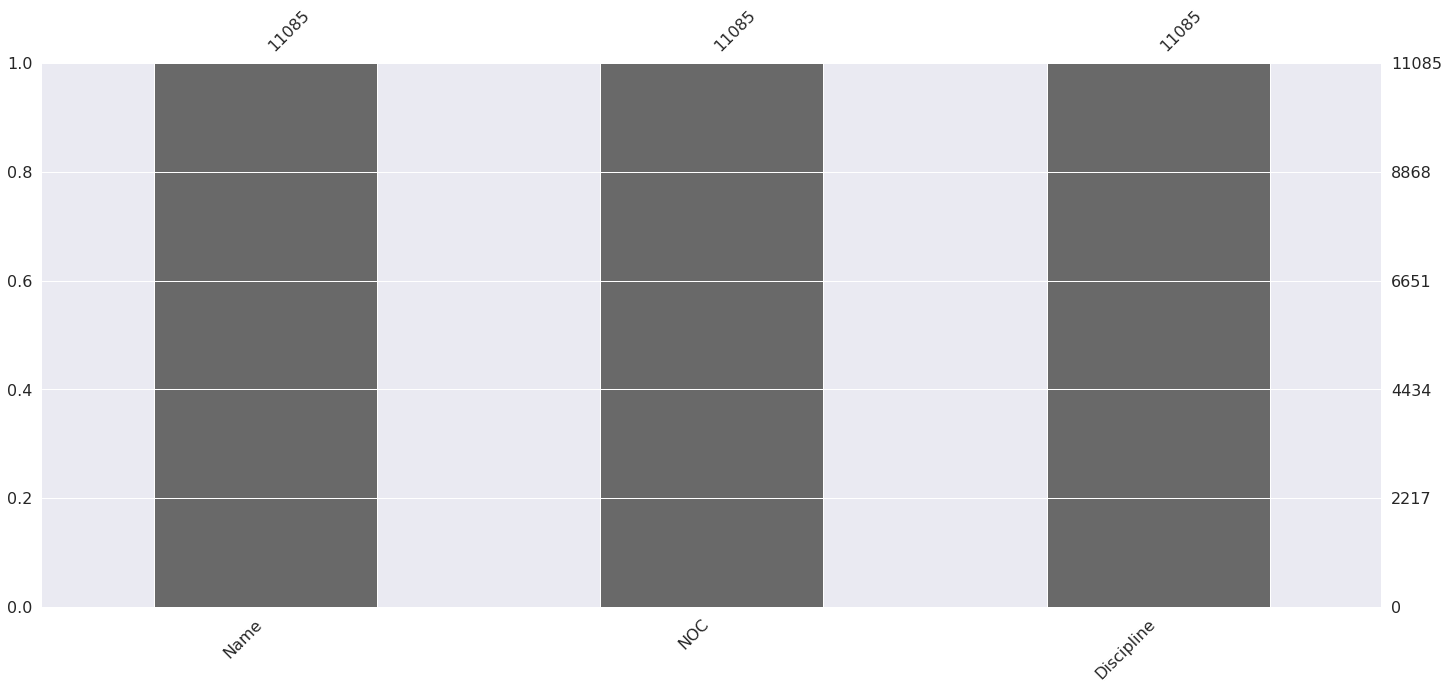

(Name          0
 NOC           0
 Discipline    0
 dtype: int64,
 Name          0.0
 NOC           0.0
 Discipline    0.0
 dtype: float64)

In [11]:
missing_val_analysis(athletes)

##### <span style="color:black">Coaches Data</span>

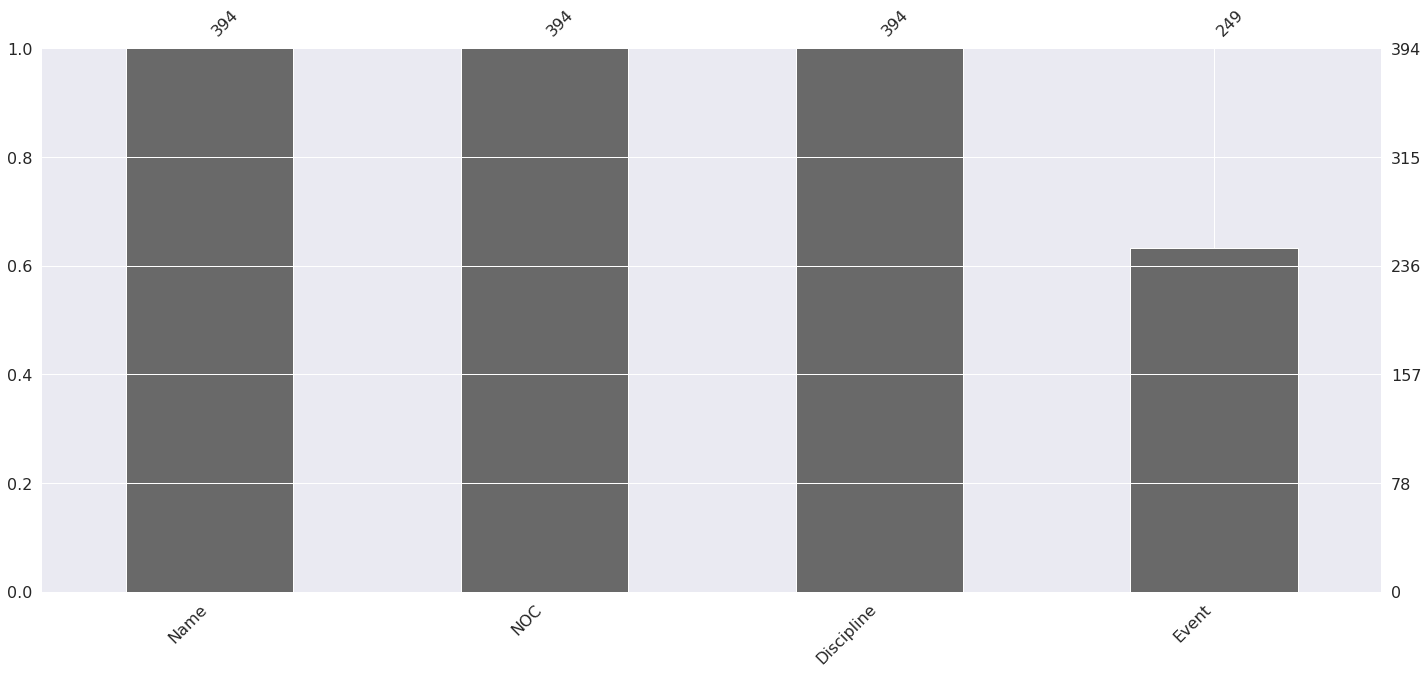

(Name            0
 NOC             0
 Discipline      0
 Event         145
 dtype: int64,
 Name          0.00000
 NOC           0.00000
 Discipline    0.00000
 Event         0.36802
 dtype: float64)

In [12]:
missing_val_analysis(coaches)

##### <span style="color:black">Gender Data</span>

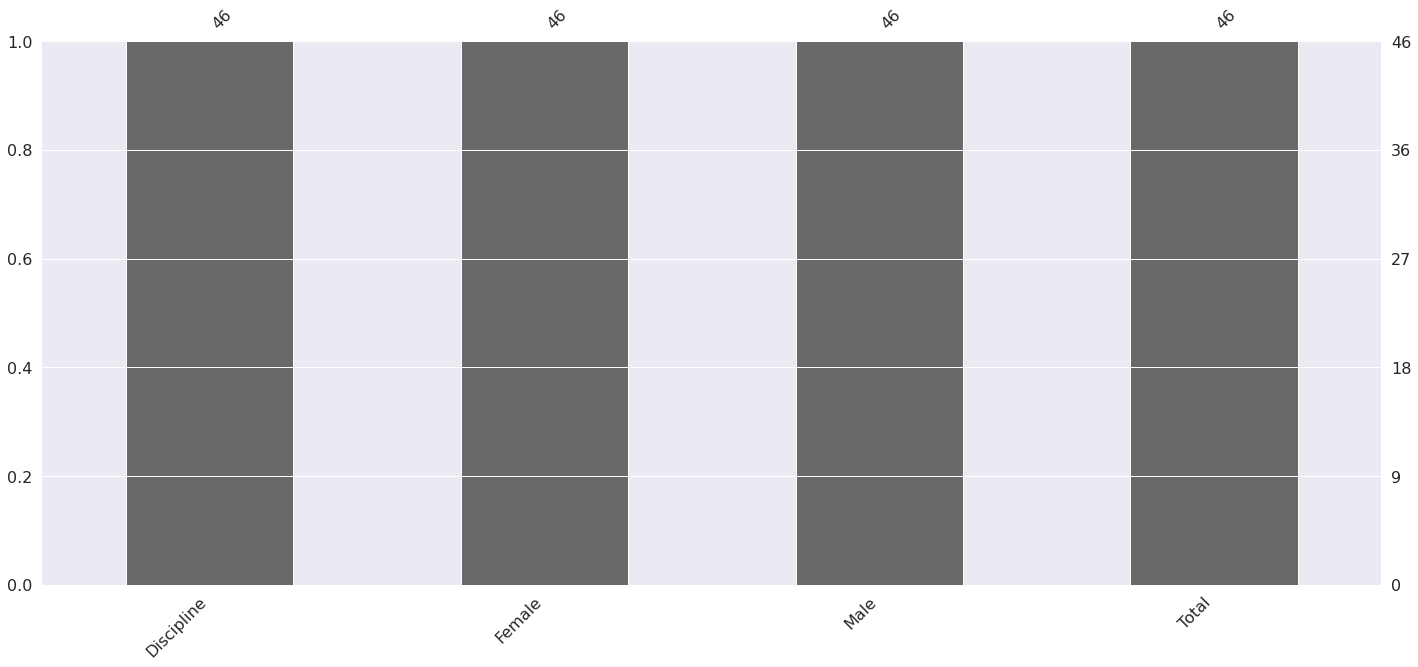

(Discipline    0
 Female        0
 Male          0
 Total         0
 dtype: int64,
 Discipline    0.0
 Female        0.0
 Male          0.0
 Total         0.0
 dtype: float64)

In [13]:
missing_val_analysis(gender)

##### <span style="color:black">Teams Data</span>

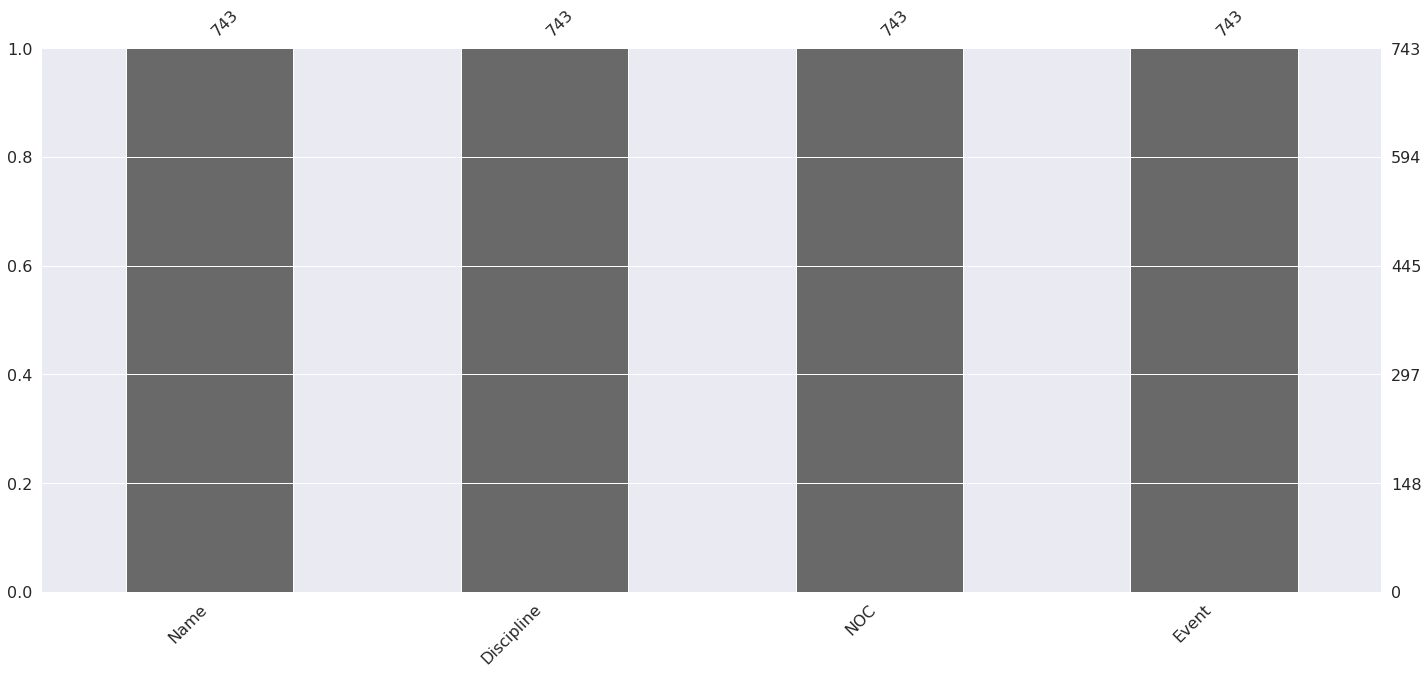

(Name          0
 Discipline    0
 NOC           0
 Event         0
 dtype: int64,
 Name          0.0
 Discipline    0.0
 NOC           0.0
 Event         0.0
 dtype: float64)

In [14]:
missing_val_analysis(teams)

##### <span style="color:black">Medals Data</span>

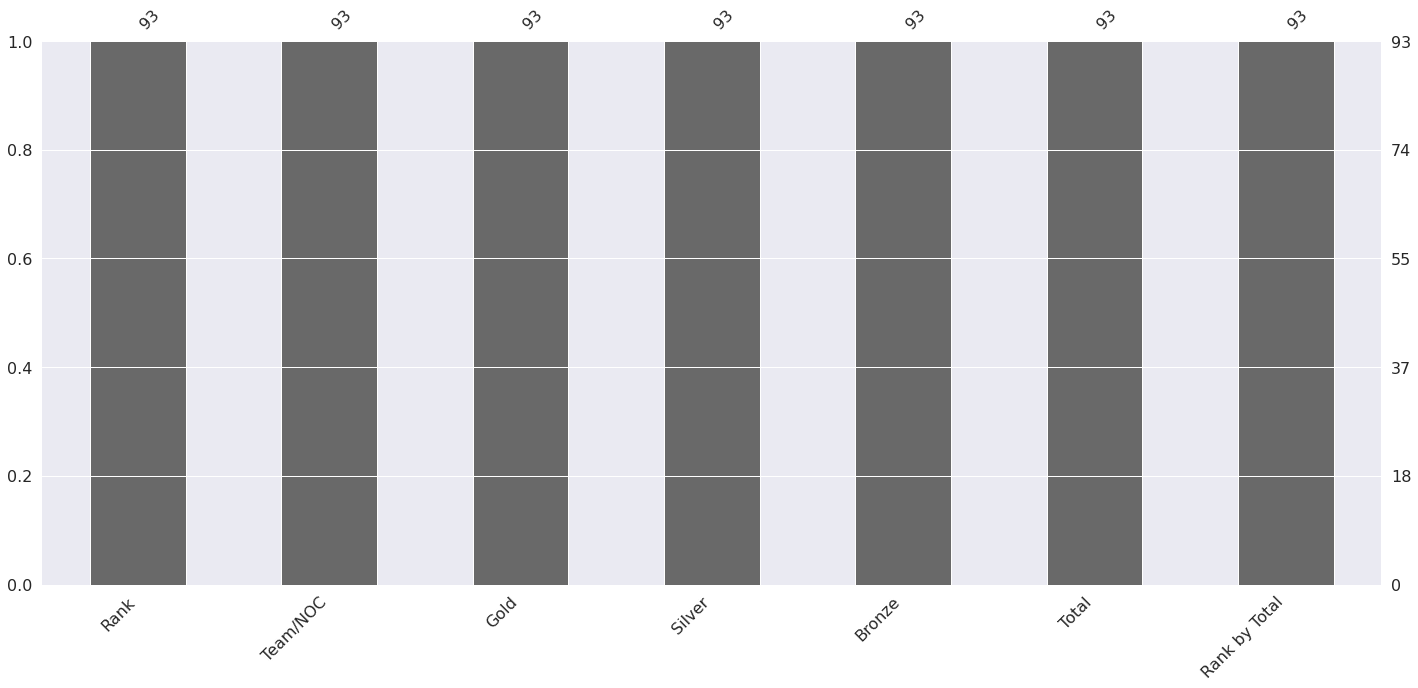

(Rank             0
 Team/NOC         0
 Gold             0
 Silver           0
 Bronze           0
 Total            0
 Rank by Total    0
 dtype: int64,
 Rank             0.0
 Team/NOC         0.0
 Gold             0.0
 Silver           0.0
 Bronze           0.0
 Total            0.0
 Rank by Total    0.0
 dtype: float64)

In [15]:
missing_val_analysis(medals)

## <span style="color:blue">***Athletes EDA***</span>

In [16]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


##### <span style='color:black'>Take a Look on Unique Values of Athletes Names, Countries and Disciplines</span>

In [17]:
len(athletes['Name'].unique()), len(athletes['NOC'].unique()), len(athletes['Discipline'].unique())

(11062, 206, 46)

### <span style="color:red">**Which Countries Sent the Most Number of Athletes?**</span>

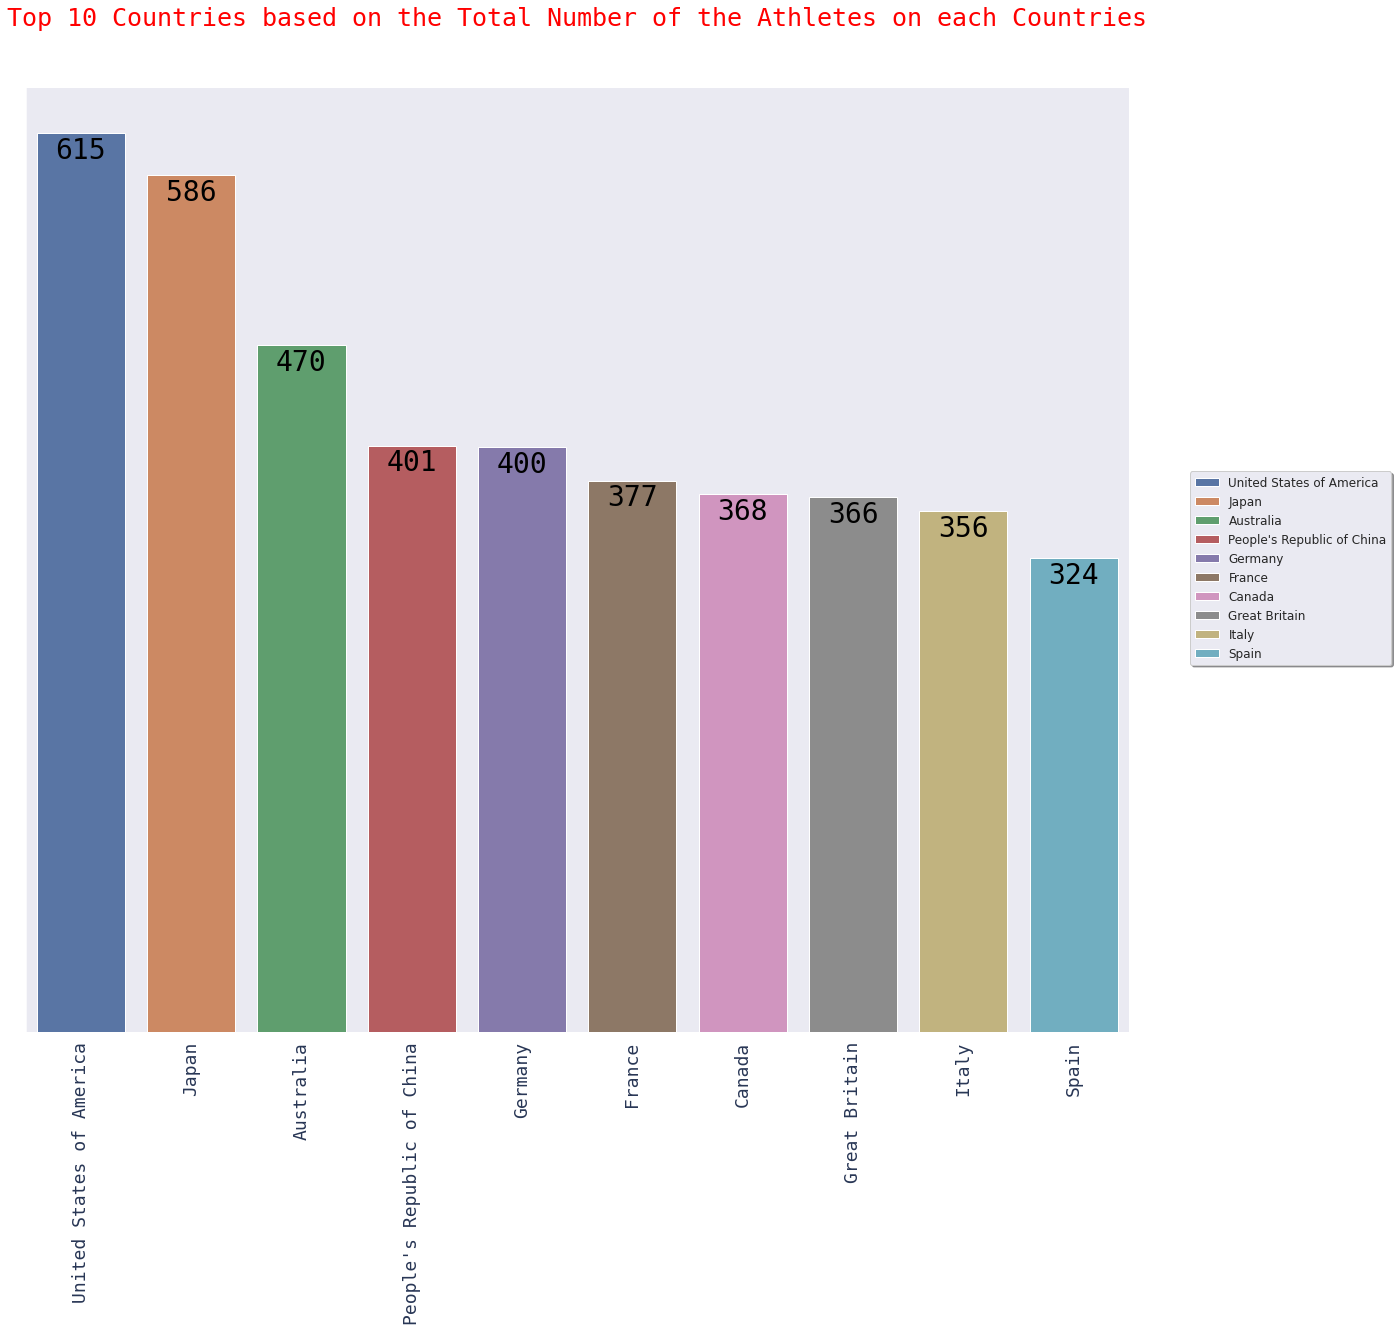

In [18]:
athletes_top10_countries=athletes.groupby('NOC')['Name'].count().sort_values(ascending=False).reset_index(name='Total Number of Athletes').head(10)
a=sns.barplot(data=athletes_top10_countries, x='NOC', y='Total Number of Athletes', hue='NOC', dodge=False)
plt.title('Top 10 Countries based on the Total Number of the Athletes on each Countries', size=25, x=0.5, y=1.06, fontname='monospace', color='red')
plt.legend(bbox_to_anchor=(1.05, 0.6), fancybox=True, shadow=True, prop={'size': 12})
plt.tight_layout()
plt.xticks(rotation=90, fontsize=18, fontname='monospace', color='#283655')
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)

for p in a.patches:
    height=np.nan_to_num(p.get_height(), 0)
    a.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2, p.get_height()-15.0), ha='center', va='center', size=28, xytext=(0, 5), textcoords='offset points', color='black', 
               fontname='monospace')
plt.show()

### <span style="color:red">**Distribution of Disciplines Participated By the Athletes**</span>

In [19]:
fig=px.pie(athletes['Discipline'].value_counts().reset_index().rename(columns={'Discipline': 'count'}), values='count', names='index', width=1450, height=800)

fig.update_traces(textposition='inside', textinfo='percent+label', hole=0.7, marker=dict(colors=['#90afc5','#336b87','#2a3132','#763626'], 
                                                                                           line=dict(color='white', width=2)))

fig.update_layout(annotations=[dict(text='The count of disciplines <br>perticipated by the athletes', x=0.5, y=0.5, font_size=26, showarrow=False, 
                                    font_family='monospace', font_color='#283655')],
                  showlegend = False)
                  
fig.show()

## <span style="color:blue">***Coaches EDA***</span>

##### <span style="color:black">Filling the Null Values</span>

In [20]:
coaches['Event'].fillna('No data', inplace=True)

In [21]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,No data
1,ABE Junya,Japan,Volleyball,No data
2,ABE Katsuhiko,Japan,Basketball,No data
3,ADAMA Cherif,Côte d'Ivoire,Football,No data
4,AGEBA Yuya,Japan,Volleyball,No data


### <span style="color:red">**Coaches According to the Disciplines by Countries**</span>

In [22]:
coaches_dis=coaches.groupby(['NOC','Name'])['Discipline'].value_counts().reset_index(name='coaches_dis')
print(coaches_dis)
px.bar(coaches_dis, x='Discipline', color='NOC', title='Coaches of each country according to discipline').show()

           NOC                     Name    Discipline  coaches_dis
0       Angola              CRUZ Filipe      Handball            1
1    Argentina         BATISTA Fernando      Football            1
2    Argentina  CADENAS MONTANES Manuel      Handball            1
3    Argentina           FERRARO Hernan    Volleyball            1
4    Argentina      GOMEZ CORA Santiago  Rugby Sevens            1
..         ...                      ...           ...          ...
376  Venezuela             SARTI Ronald    Volleyball            1
377  Venezuela            VASQUEZ Diego    Basketball            1
378  Venezuela         VILLEGAS Orlando    Volleyball            1
379     Zambia           KANUNGO Bergin      Football            1
380     Zambia              MWAPE Bruce      Football            1

[381 rows x 4 columns]


### <span style='color:red'>**Coaches According to the Events by Countries**</span>

In [23]:
coaches_event=coaches.groupby(['NOC','Name'])['Event'].value_counts().reset_index(name='coaches_event')
print(coaches_event)
px.bar(coaches_event, x='Event', color='NOC', title='Coaches of each country according to event').show()

           NOC                     Name    Event  coaches_event
0       Angola              CRUZ Filipe    Women              1
1    Argentina         BATISTA Fernando      Men              1
2    Argentina  CADENAS MONTANES Manuel      Men              1
3    Argentina           FERRARO Hernan    Women              1
4    Argentina      GOMEZ CORA Santiago      Men              1
..         ...                      ...      ...            ...
388  Venezuela             SARTI Ronald      Men              1
389  Venezuela            VASQUEZ Diego  No data              1
390  Venezuela         VILLEGAS Orlando  No data              1
391     Zambia           KANUNGO Bergin  No data              1
392     Zambia              MWAPE Bruce    Women              1

[393 rows x 4 columns]


## <span style='color:blue'>***Gender EDA***</span>

In [24]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


##### <span style='color:black'>Take a Look of Unique Number of Genders Participated in the Olympic 2021</span>

In [25]:
gender['Female'].sum(), gender['Male'].sum(), gender['Total'].sum()

(5432, 5884, 11316)

### <span style='color:red'>How Many Female Athletes Participated in each Discipline?</span>

In [26]:
female_dis=gender.groupby('Discipline')['Female'].sum().sort_values(ascending=False).reset_index(name='female_dis')
print(female_dis.head(7))
px.bar(female_dis, x='Discipline', y='female_dis', color='Discipline', title='Total number of female athletes in each discipline').show()

  Discipline  female_dis
0  Athletics         969
1   Swimming         361
2   Football         264
3     Rowing         257
4       Judo         192
5     Hockey         192
6   Shooting         178


### <span style='color:red'>How Many Male Athletes Participated in each Discipline?</span>

In [27]:
male_dis=gender.groupby('Discipline')['Male'].sum().sort_values(ascending=False).reset_index(name='male_dis')
print(male_dis.head(7))
px.bar(male_dis, x='Discipline', y='male_dis', color='Discipline', title='Total number of male athletes in each discipline').show()

  Discipline  male_dis
0  Athletics      1072
1   Swimming       418
2   Football       344
3     Rowing       265
4       Judo       201
5  Wrestling       193
6     Hockey       192


### <span style='color:red'>What is the Difference between Male and Female Athletes in each Discipline></span>

In [28]:
gender['Difference']=gender['Male']-gender['Female']
gender.head(10)

,Discipline,Female,Male,Total,Difference
0,3x3 Basketball,32,32,64,0
1,Archery,64,64,128,0
2,Artistic Gymnastics,98,98,196,0
3,Artistic Swimming,105,0,105,-105
4,Athletics,969,1072,2041,103
5,Badminton,86,87,173,1
6,Baseball/Softball,90,144,234,54
7,Basketball,144,144,288,0
8,Beach Volleyball,48,48,96,0
9,Boxing,102,187,289,85


In [29]:
gender['Female'].sum()-gender['Male'].sum()

-452

##### <span style='color:orange'>Male Athletes are 452 more than Female Athletes</span>

In [30]:
difference=gender.groupby('Discipline')['Difference'].sum().sort_values(ascending=False).reset_index(name='difference')
print(difference.head(7))
px.bar(difference, x='Discipline', y='difference', color='Discipline', title='(Male-Female) Athletes in each discipline').show()

          Discipline  difference
0          Athletics         103
1          Wrestling          97
2             Boxing          85
3           Football          80
4       Cycling Road          61
5           Swimming          57
6  Baseball/Softball          54


## <span style='color:blue'>***Teams EDA***</span>

In [31]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [32]:
len(teams['Name'].unique())==len(teams['NOC'].unique())

False

In [33]:
len(teams['Name'].unique()), len(teams['Discipline'].unique()), len(teams['NOC'].unique()), len(teams['Event'].unique())

(146, 20, 84, 36)

### <span style='color:red'>Which are the Top Disciplines that Participated by the Teams?</span>

Rugby Sevens          24
Football              28
Artistic Swimming     32
Beach Volleyball      48
Table Tennis          48
Fencing               52
Archery               53
Cycling Track         64
Athletics             79
Swimming             113
Name: Discipline, dtype: int64


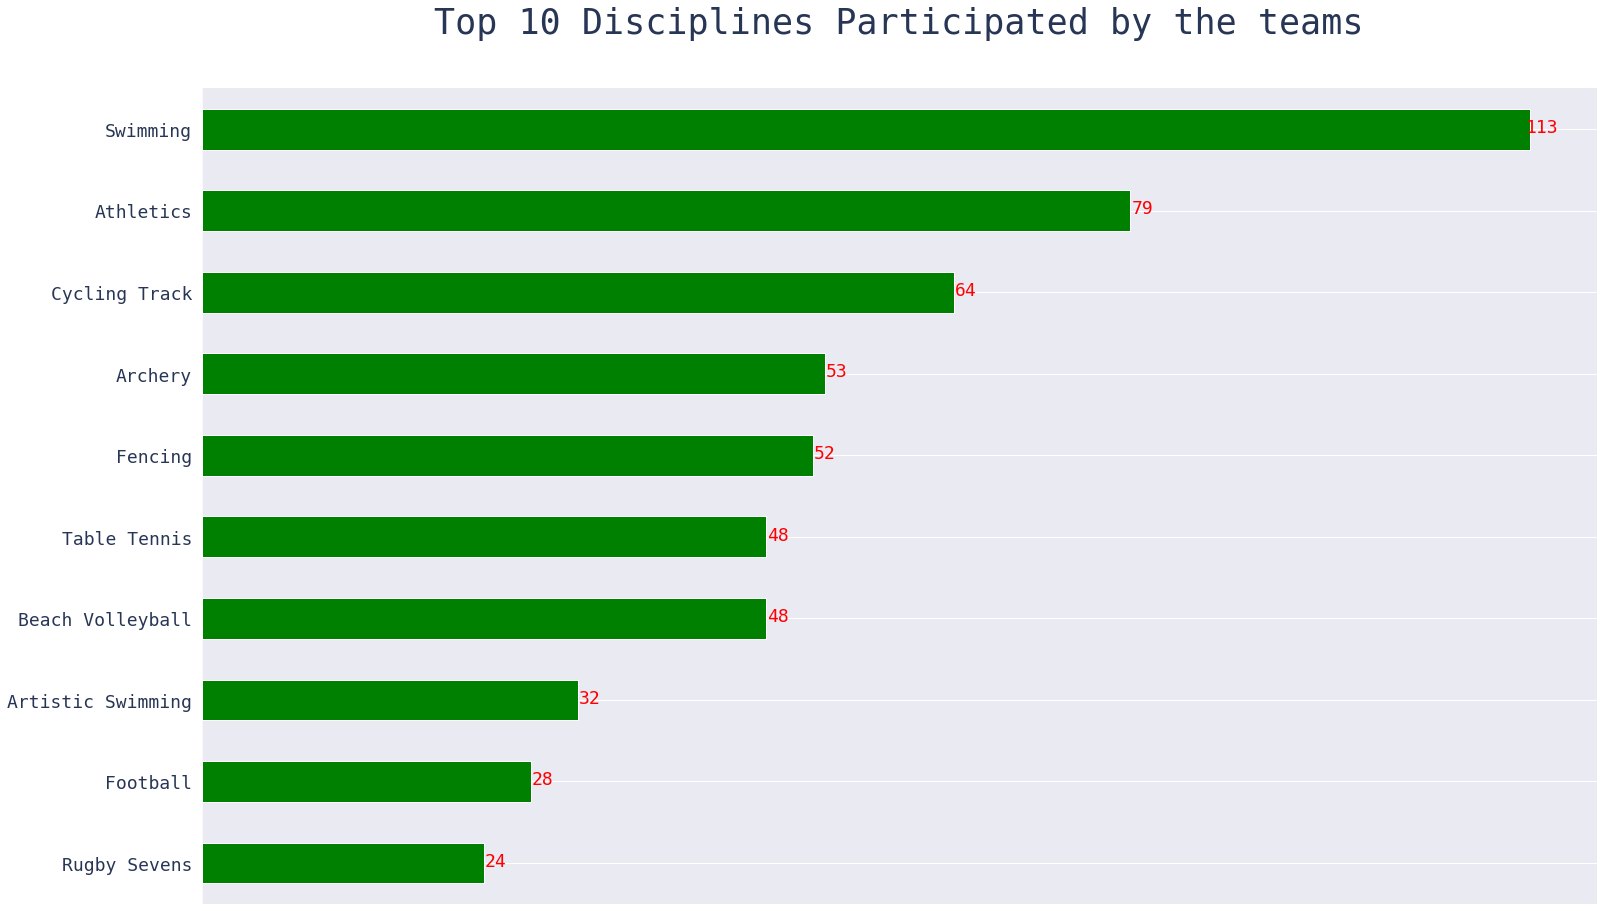

In [34]:
top_10_disciplines=teams['Discipline'].value_counts().sort_values().tail(10)
print(top_10_disciplines)
a=top_10_disciplines.plot(kind='barh', figsize=(25,15), color='green')
plt.title('Top 10 Disciplines Participated by the teams', size=35, x=0.5, y=1.06, fontname='monospace', color='#283655')
plt.xticks([])
plt.yticks(fontname='monospace', fontsize=18, color='#283655')
plt.ylabel('')
plt.xlabel('')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
    
for p in a.patches:
    width = p.get_width()
    a.text(1+width, p.get_y()+0.55*p.get_height(), f'{int(width)}', ha='center', va='center', fontname='monospace', fontsize=18, color='red')
plt.show()

### <span style='color:red'>Which are the Top Disciplines According to the Events?</span>

In [35]:
dis_event=teams.groupby('Event')['Discipline'].count().sort_values(ascending=False).reset_index(name='Discipline Count')
dis_event.head()

,Event,Discipline Count
0,Men,120
1,Women,114
2,Men's Team,40
3,Women's Team,40
4,Mixed Team,29


In [36]:
dis_event['Discipline Count']=(dis_event['Discipline Count']/dis_event['Discipline Count'].sum())*100
dis_event.head()

,Event,Discipline Count
0,Men,16.150740
1,Women,15.343203
2,Men's Team,5.383580
3,Women's Team,5.383580
4,Mixed Team,3.903096


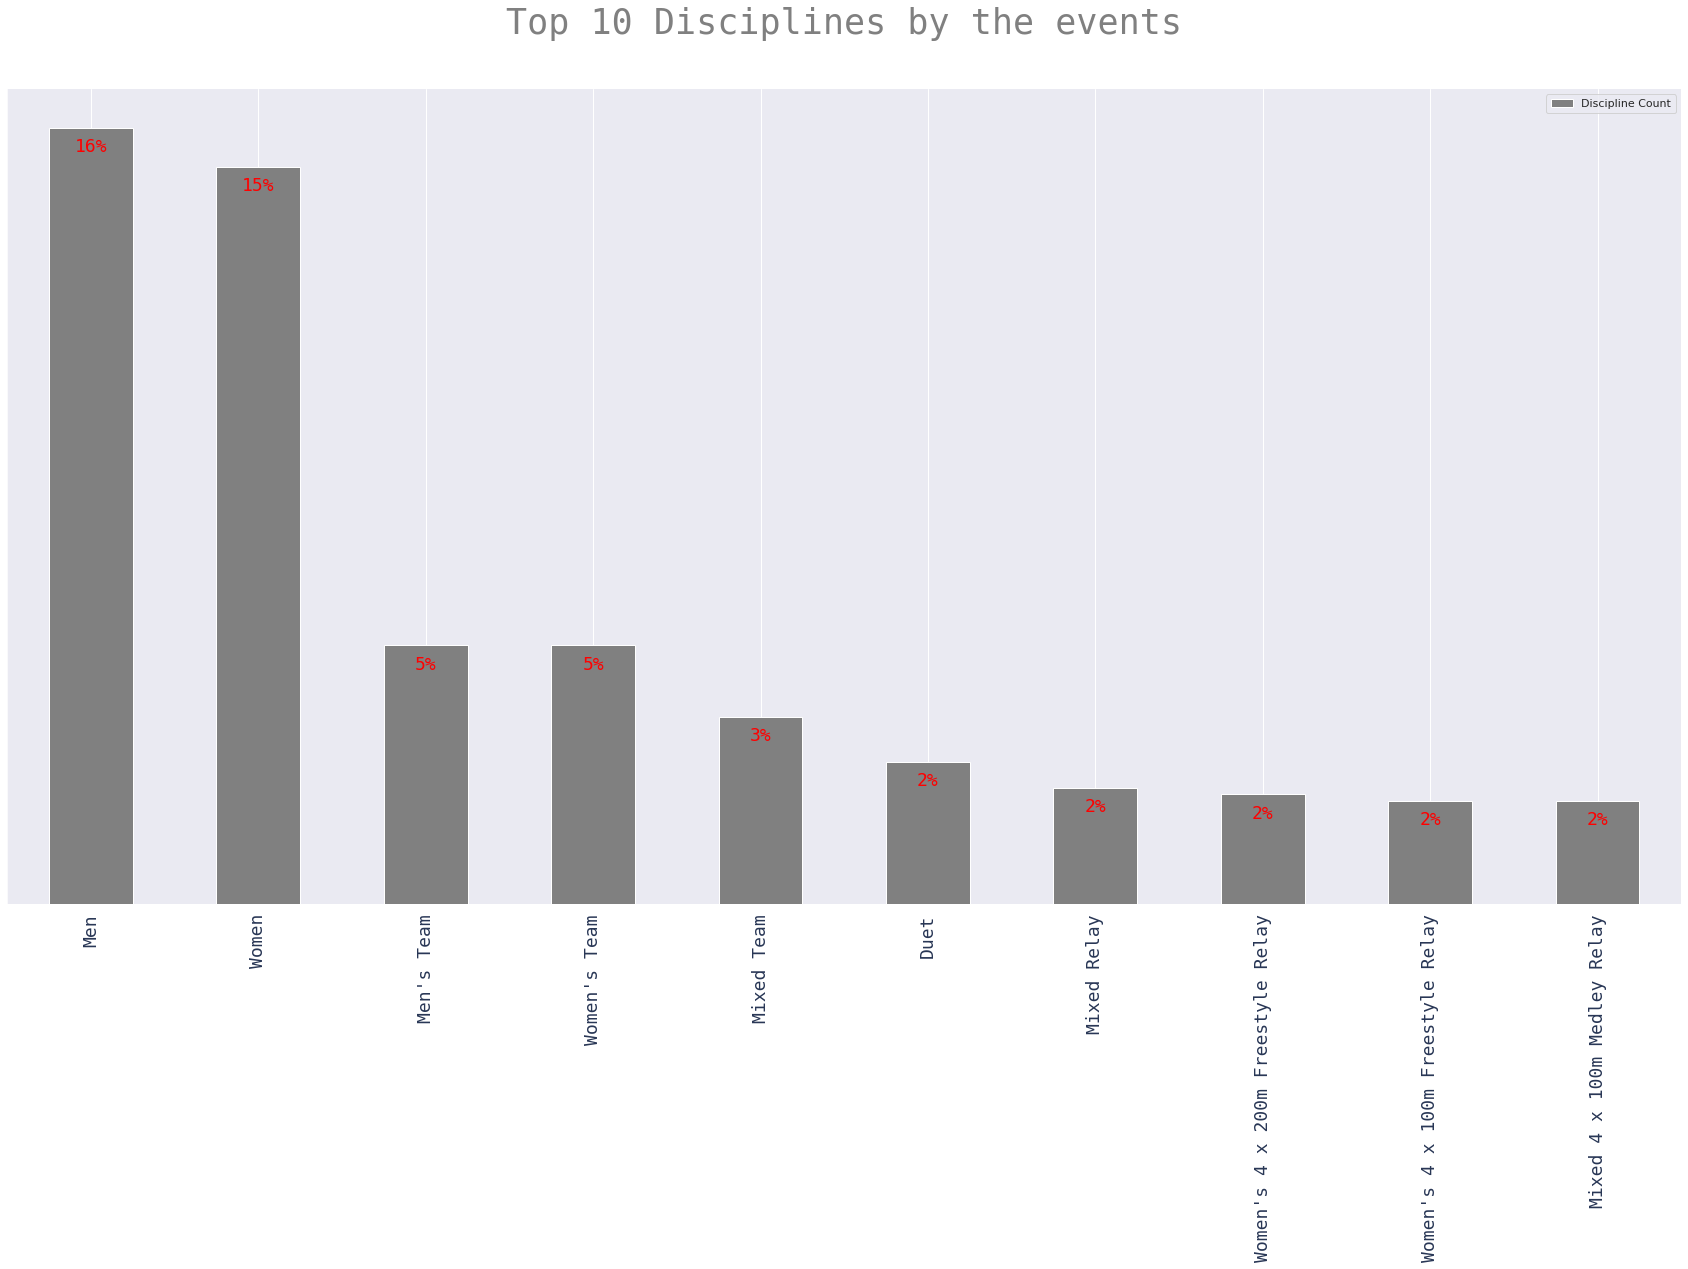

In [37]:
a=dis_event.head(10).plot(kind='bar', x='Event', figsize=(30,15), color='gray')
plt.title('Top 10 Disciplines by the events', size=35, x=0.5, y=1.06, fontname='monospace', color='gray')
plt.xticks(fontname='monospace', fontsize=18, color='#283655')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)

for p in a.patches:
    height=p.get_height()
    a.annotate(f'{int(height)}%', (p.get_x()+p.get_width()/2, p.get_height()-0.50), ha='center', va='center', size=18,xytext=(0, 5), textcoords='offset points', 
               color='red', fontname='monospace')
plt.show()

## <span style='color:blue'>***Medals EDA***</span>

In [38]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


### <span style='color:red'>How Many Countries Have Won at least One Medal?</span>

In [39]:
medal_winner_countries=len(medals['Team/NOC'].unique())
medal_winner_countries

93

### <span style='color:red'>Which Countries are in Top 10 based on the Ranking?</span>

In [40]:
top10_ranked_countries=medals['Team/NOC'].head(10)
print(top10_ranked_countries)

0      United States of America
1    People's Republic of China
2                         Japan
3                 Great Britain
4                           ROC
5                     Australia
6                   Netherlands
7                        France
8                       Germany
9                         Italy
Name: Team/NOC, dtype: object


### <span style='color:red'>Which Countries are the Most Gold Medal Winner?</span>

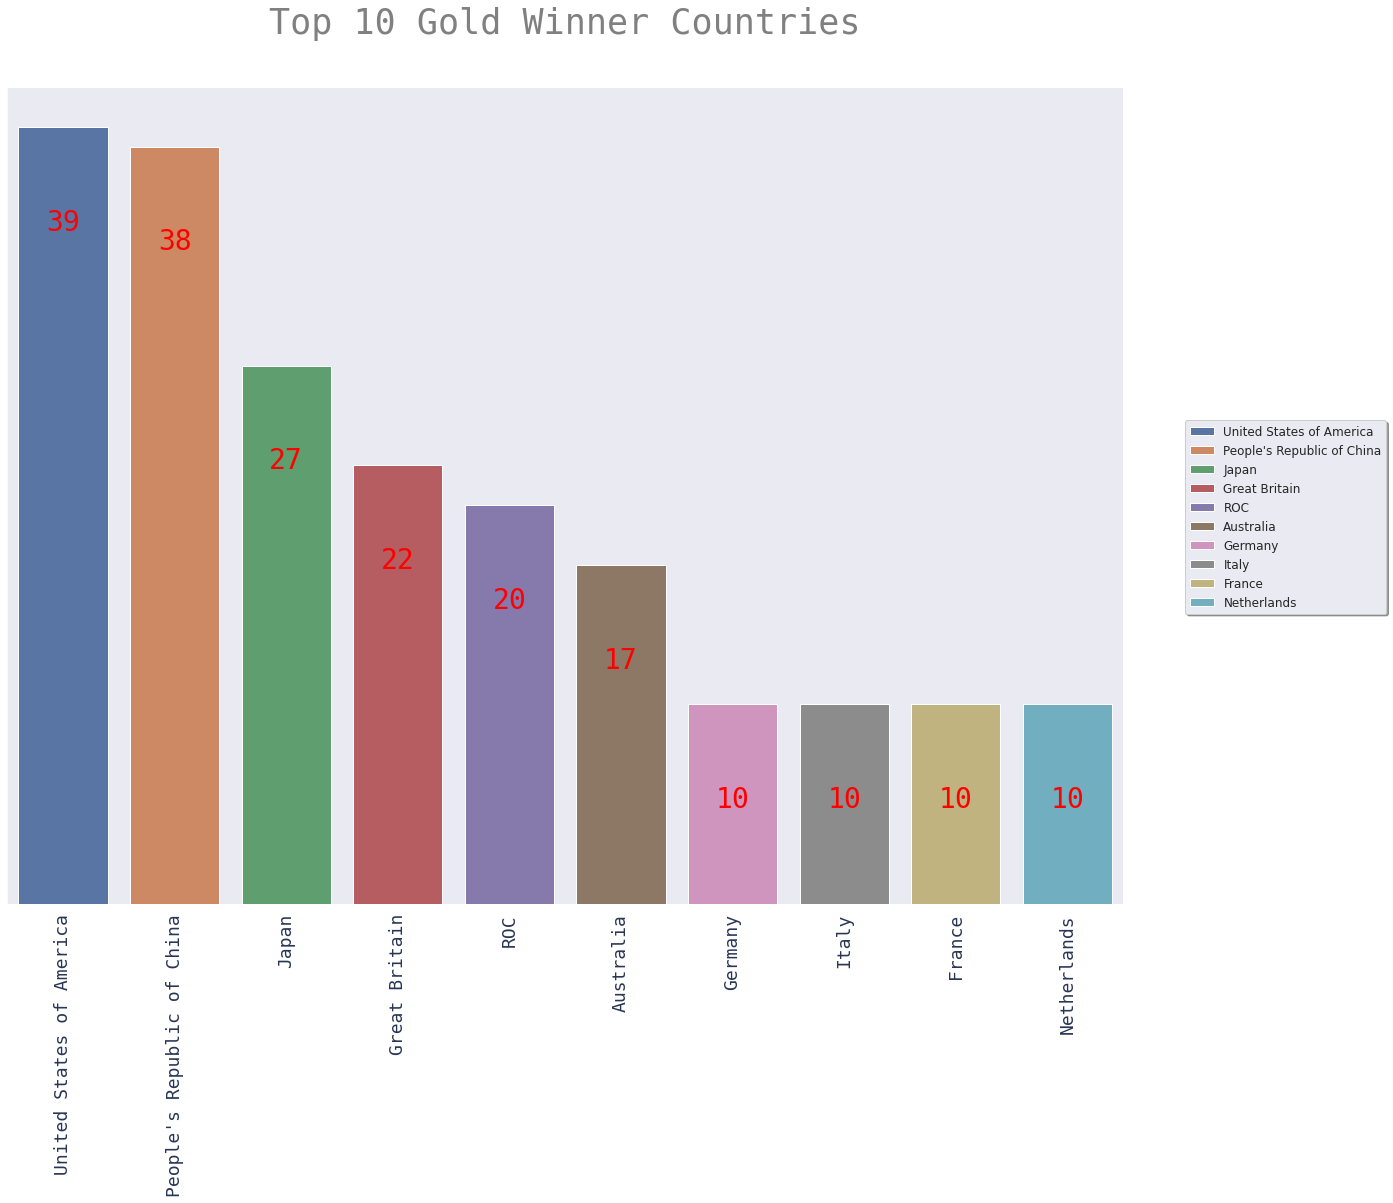

In [41]:
top10_golds=medals.groupby('Team/NOC')['Gold'].sum().sort_values(ascending=False).reset_index(name='top10_golds').head(10)
a=sns.barplot(data=top10_golds, x='Team/NOC', y='top10_golds', hue='Team/NOC', dodge=False)
plt.title('Top 10 Gold Winner Countries', size=35, x=0.5, y=1.06, fontname='monospace', color='gray')
plt.legend(bbox_to_anchor=(1.05, 0.6), fancybox=True, shadow=True, prop={'size': 12})
plt.xticks(rotation=90, fontsize=18, fontname='monospace', color='#283655')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)

for p in a.patches:
    height=np.nan_to_num(p.get_height(), 0)
    a.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2, p.get_height()-5.0), ha='center', va='center', size=28,xytext=(0, 5), textcoords='offset points', color='red', 
               fontname='monospace')
plt.show()

### <span style='color:red'>Which Countries are the Most Silver Medal Winner?</span>

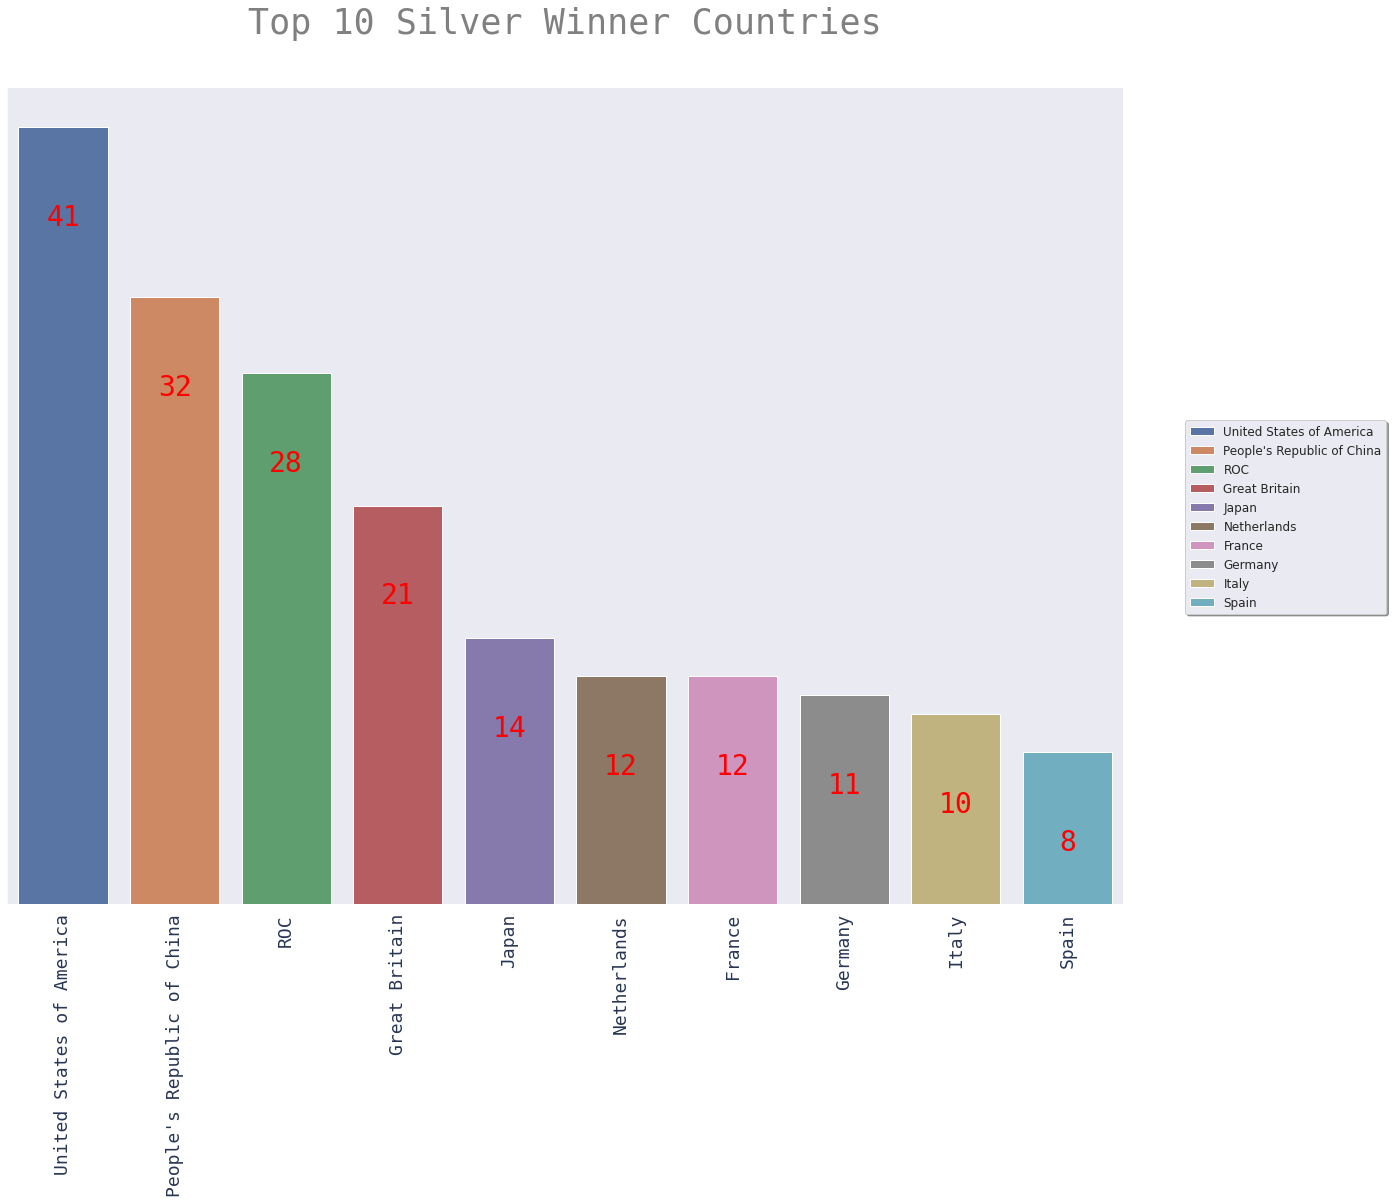

In [42]:
top10_silver=medals.groupby('Team/NOC')['Silver'].sum().sort_values(ascending=False).reset_index(name='top10_silver').head(10)
a=sns.barplot(data=top10_silver, x='Team/NOC', y='top10_silver', hue='Team/NOC', dodge=False)
plt.title('Top 10 Silver Winner Countries', size=35, x=0.5, y=1.06, fontname='monospace', color='gray')
plt.legend(bbox_to_anchor=(1.05, 0.6), fancybox=True, shadow=True, prop={'size': 12})
plt.xticks(rotation=90, fontsize=18, fontname='monospace', color='#283655')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)

for p in a.patches:
    height=np.nan_to_num(p.get_height(), 0)
    a.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2, p.get_height()-5.0), ha='center', va='center', size=28,xytext=(0, 5), textcoords='offset points', color='red', 
               fontname='monospace')
plt.show()

### <span style='color:red'>Which Countries are the Most Bronze Medal Winner?</span>

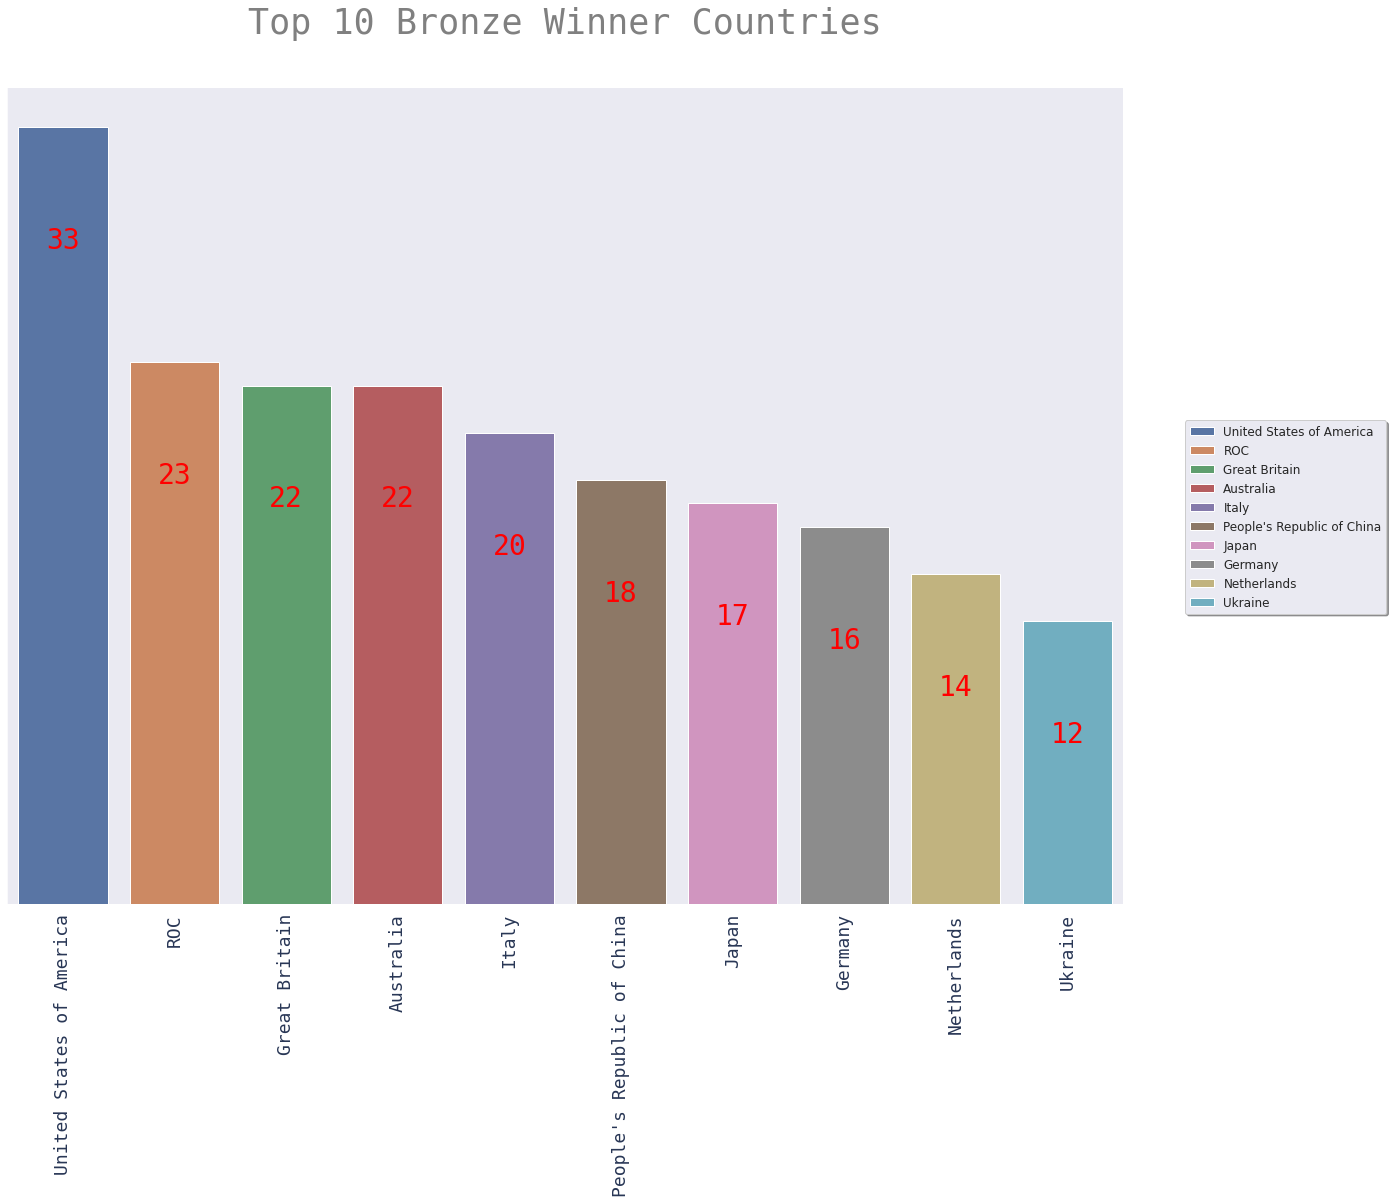

In [43]:
top10_bronze=medals.groupby('Team/NOC')['Bronze'].sum().sort_values(ascending=False).reset_index(name='top10_bronze').head(10)
a=sns.barplot(data=top10_bronze, x='Team/NOC', y='top10_bronze', hue='Team/NOC', dodge=False)
plt.title('Top 10 Bronze Winner Countries', size=35, x=0.5, y=1.06, fontname='monospace', color='gray')
plt.legend(bbox_to_anchor=(1.05, 0.6), fancybox=True, shadow=True, prop={'size': 12})
plt.xticks(rotation=90, fontsize=18, fontname='monospace', color='#283655')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)

for p in a.patches:
    height=np.nan_to_num(p.get_height(), 0)
    a.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2, p.get_height()-5.0), ha='center', va='center', size=28,xytext=(0, 5), textcoords='offset points', color='red', 
               fontname='monospace')
plt.show()

### <span style='color:red'>Which Countries are the Most Medal Winner?</span>

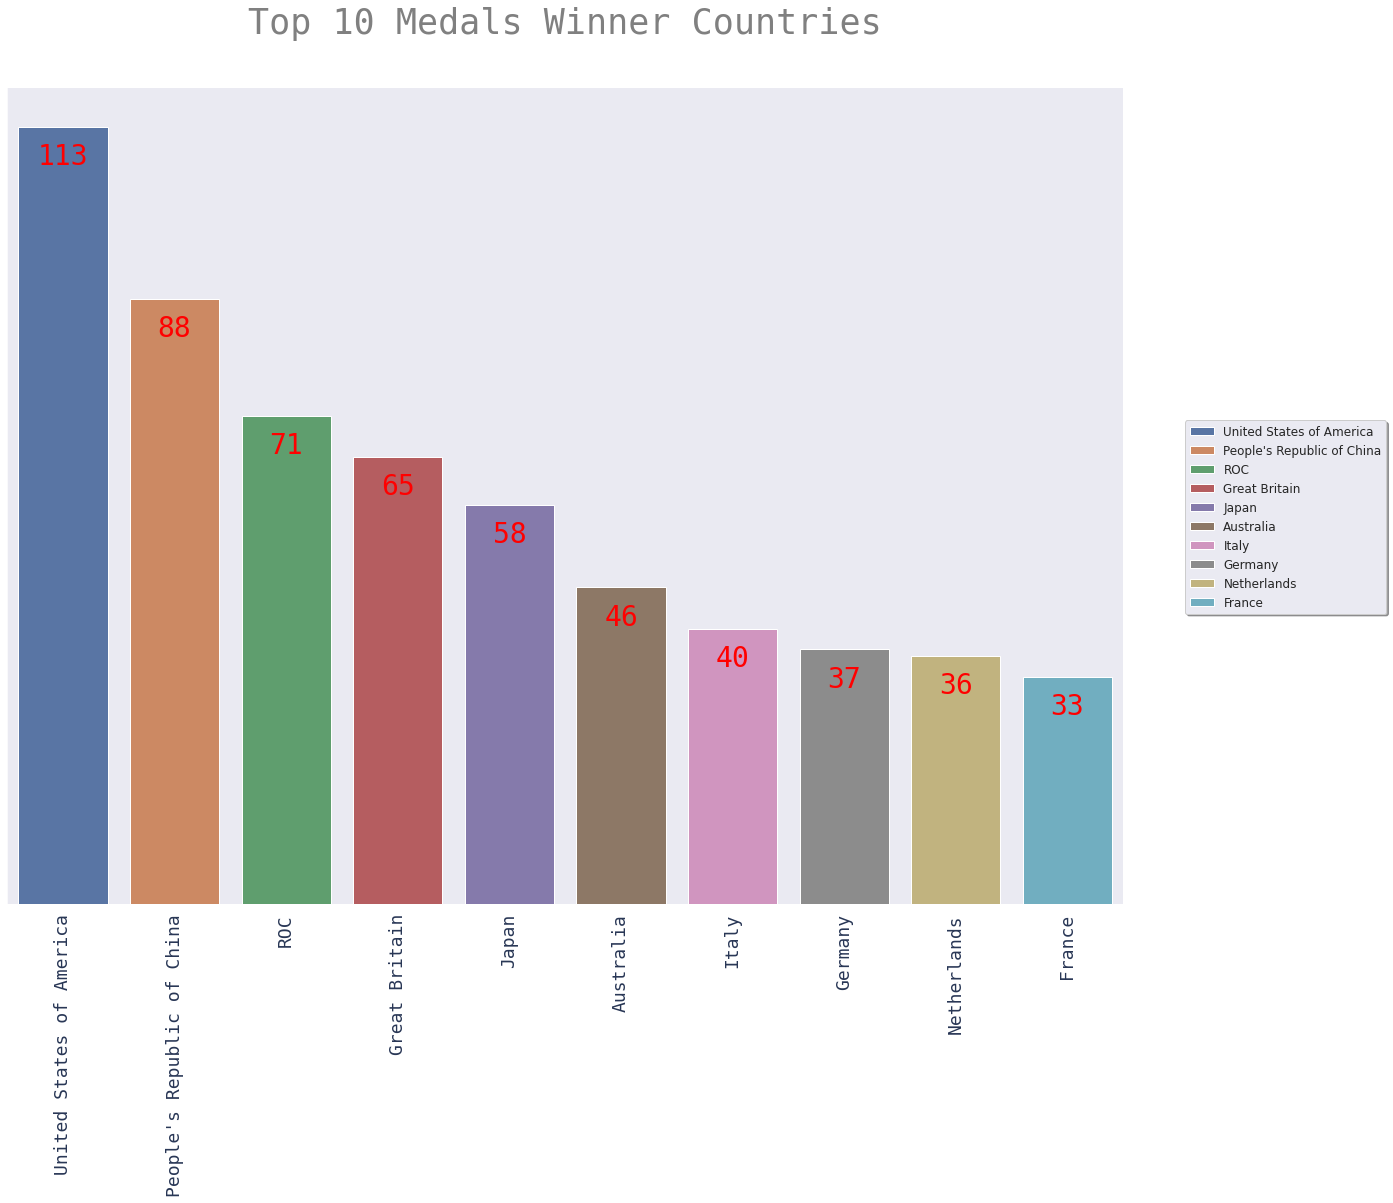

In [44]:
top10_medals=medals.groupby('Team/NOC')['Total'].sum().sort_values(ascending=False).reset_index(name='top10_medals').head(10)
a=sns.barplot(data=top10_medals, x='Team/NOC', y='top10_medals', hue='Team/NOC', dodge=False)
plt.title('Top 10 Medals Winner Countries', size=35, x=0.5, y=1.06, fontname='monospace', color='gray')
plt.legend(bbox_to_anchor=(1.05, 0.6), fancybox=True, shadow=True, prop={'size': 12})
plt.xticks(rotation=90, fontsize=18, fontname='monospace', color='#283655')
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)

for p in a.patches:
    height=np.nan_to_num(p.get_height(), 0)
    a.annotate(f'{int(height)}', (p.get_x()+p.get_width()/2, p.get_height()-5.0), ha='center', va='center', size=28,xytext=(0, 5), textcoords='offset points', color='red', 
               fontname='monospace')
plt.show()

### <span style='color:red'>Medal Distribution in % that are Won by the Countries</span>

In [45]:
fig=px.pie(medals.groupby('Team/NOC')['Total'].sum().reset_index(), values='Total', names='Team/NOC', width=1450, height=800)

fig.update_traces(textposition='inside', textinfo='percent+label', hole=0.7, marker=dict(colors=['#90afc5','#336b87','#2a3132','#763626'], line=dict(color='white', width=2)))

fig.update_layout(annotations=[dict(text='The Percentage of Total<br>medal winners by the countries', x=0.5, y=0.5, font_size=26, showarrow=False, font_family='monospace', 
                                    font_color='#283655')],
                  showlegend = False)
                  
fig.show()

# <span style="color:green">**What's Next**</span>

#### <span style="color:orange">**More EDA by merging the datasets.**</span>
#### <span style="color:orange">**Further analysis when data will update.**</span>